In [1]:

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt




In [2]:
# getting data folders from Github
!git clone https://github.com/fatihcihant/kaggle-Fruits360-


Cloning into 'kaggle-Fruits360-'...
remote: Enumerating objects: 90760, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 90760 (delta 0), reused 3 (delta 0), pack-reused 90757
Receiving objects: 100% (90760/90760), 718.62 MiB | 20.87 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Checking out files: 100% (90488/90488), done.


In [3]:
train_path = "/content/kaggle-Fruits360-/fruits-360_dataset/fruits-360/Training/"
test_path = "/content/kaggle-Fruits360-/fruits-360_dataset/fruits-360/Test/"

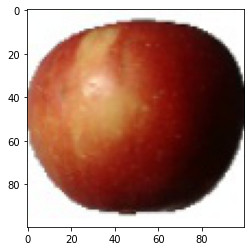

In [4]:
from tensorflow.keras.utils import load_img, img_to_array
temp_image = load_img(train_path + "Apple Braeburn/0_100.jpg")
plt.imshow(temp_image) 

In [5]:
x = img_to_array(temp_image)
x.shape # 3 means rgb

(100, 100, 3)

In [6]:
from glob import glob
className = glob(train_path + "/*") # take all name in train path...
numberOfClass = len(className)
numberOfClass

131

In [7]:
from keras.layers.core.activation import Activation
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout


model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = x.shape, activation = "relu"))
model.add(MaxPool2D()) 

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D()) 

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPool2D()) 

model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))

  # output layer
model.add(Dense(numberOfClass, activation = "softmax"))

from keras.optimizers.optimizer_experimental import optimizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer = "rmsprop", loss="categorical_crossentropy", metrics=['accuracy'])


batch_size = 32 # describes how many images will be processed in each iteration

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [9]:
# Data Augmentation
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,# feature scaling
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255) # train_set is normalized so test_set must also be


training_set = train_datagen.flow_from_directory(train_path,
                                                target_size = x.shape[:2], # we don't need 3 (number of channel info)
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 color_mode = "rgb"
                                                )
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = x.shape[:2], 
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            color_mode = "rgb")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [42]:
hist = model.fit_generator(generator = training_set, 
                 validation_data = test_set, 
                 epochs = 100, 
                 steps_per_epoch = (1600//batch_size), 
                 validation_steps = (800 // batch_size))

Epoch 1/100


<ipython-input-42-e40183e4ffd8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = training_set,


50/50 [==============================] - 30s 595ms/step - loss: 0.1509 - accuracy: 0.9575 - val_loss: 0.4816 - val_accuracy: 0.8900
Epoch 2/100
50/50 [==============================] - 28s 565ms/step - loss: 0.2001 - accuracy: 0.9469 - val_loss: 0.2287 - val_accuracy: 0.9375
Epoch 3/100
50/50 [==============================] - 28s 566ms/step - loss: 0.1543 - accuracy: 0.9488 - val_loss: 0.2300 - val_accuracy: 0.9425
Epoch 4/100
50/50 [==============================] - 28s 567ms/step - loss: 0.1499 - accuracy: 0.9581 - val_loss: 0.2210 - val_accuracy: 0.9450
Epoch 5/100
50/50 [==============================] - 28s 568ms/step - loss: 0.1458 - accuracy: 0.9538 - val_loss: 0.3488 - val_accuracy: 0.9538
Epoch 6/100
50/50 [==============================] - 28s 568ms/step - loss: 0.1432 - accuracy: 0.9581 - val_loss: 0.1331 - val_accuracy: 0.9600
Epoch 7/100
50/50 [==============================] - 30s 595ms/step - loss: 0.1369 - accuracy: 0.9625 - val_loss: 0.1562 - val_accuracy: 0.9575
Epoc


* steps_per_epoch is greater than the all train samples.The pictures produced by ImageDataGenerator will complete our missing images.

So, we have learned the difference between Keras.fit and Keras.fit_generator functions used to train a deep learning neural network
.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.

In [43]:
 # serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [44]:
from keras.models import model_from_json
"""
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
"""

'\n# load json and create model\njson_file = open(\'model.json\', \'r\')\nloaded_model_json = json_file.read()\njson_file.close()\nloaded_model = model_from_json(loaded_model_json)\n# load weights into new model\nloaded_model.load_weights("model.h5")\n'

In [45]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


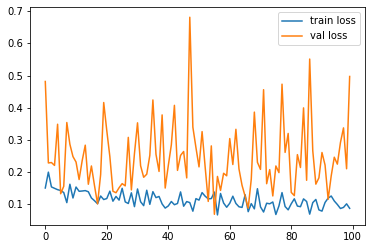

In [51]:
plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

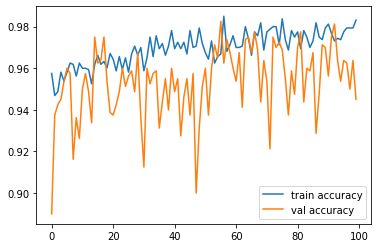

In [52]:
plt.plot(hist.history["accuracy"], label = "train accuracy")
plt.plot(hist.history["val_accuracy"], label = "val accuracy")
plt.legend()
plt.show()

In [48]:
test_image_path = "/content/kaggle-Fruits360-/fruits-360_dataset/fruits-360/test-multiple_fruits/Bananas(lady_finger)1.jpg"

In [49]:

import numpy as np
from keras.preprocessing import image
import tensorflow as tf

def test_single_image(test_image_path):
  test_image = tf.keras.preprocessing.image.load_img(test_image_path, target_size = (100,100))
  test_image = tf.keras.utils.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0) # our model is trained with batches so we have to add extra dimension to run single image
  result = model.predict(test_image/255.0)
  result_class = np.argmax(result, axis = 1)
  # print(training_set.class_indices)
  # print(result_class)
  key_list = list(training_set.class_indices.keys())
  val_list = list(training_set.class_indices.values())
  position = val_list.index(result_class)
  return(key_list[position])

In [50]:
test_single_image(test_image_path)

1/1 [==============================] - 0s 28ms/step


'Banana Lady Finger'